# Section 0: PyTorch Introduction
At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy but can run on GPUs
- Automatic differentiation for building and training neural networks

In [ ]:
# import Torch packages and its submodules
import torch
from torch import nn, optim

# import TorchVision and its submodules
import torch.nn.functional as F
from torchvision import datasets, transforms

# import other packages
import numpy as np
import math

import matplotlib
from matplotlib import pyplot as plt


# Section 1: Loading datasets
we quickly review how we can load the predefined datasets in torch, and how we can load our owns.

custom datasets:




In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

from google.colab import drive
drive.mount('/content/drive')

TRAIN_DATA_PATH = "/content/drive/MyDrive/flower_photos/train"
TEST_DATA_PATH = "/content/drive/MyDrive/flower_photos/test"
# Download and load the training data
trainset = datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.ImageFolder(root=TEST_DATA_PATH, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# print(trainset[1])
plt.imshow(trainset[1][0].T)
plt.show()
print(trainset)
print(testset)

preset datasets:

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/Desktop/FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Desktop/FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/Desktop/FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Desktop/FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/Desktop/FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Desktop/FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/Desktop/FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Desktop/FashionMNIST_data/FashionMNIST/raw

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/Desktop/FashionMNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/Desktop/FashionMNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


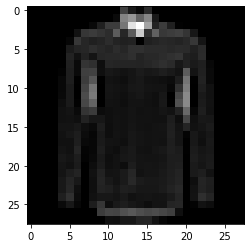

Label: 6


In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/Desktop/FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/Desktop/FashionMNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

print(trainset)
print(testset)

# Display image and label.
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Section 2: Defining the Model

approach 1:

In [ ]:
# define the neural network model (approach 1)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
        
# Create the network and look at it's text representation
model = Network()
print(model)
print(model.parameters())

approach 2:

In [ ]:
# define the neural network model (approach 2)
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

or you can simply feed an ordered dictionary to have a name for each module (layer):

In [ ]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model

# Section 2: Training

In [ ]:
from tqdm import tqdm

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

# Section 3: Evaluation


In [ ]:
accuracy = 0

for images, labels in testloader:
    images = images.view(images.shape[0], -1)
    log_ps = model(images)

    # get the predictions: argmax etc.
    ps = torch.exp(log_ps)
    top_p, top_class = ps.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))

        
print("Test Accuracy: {:.3f}".format(accuracy/len(testloader)))